# 4. Iris Dataset

## Imports

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display as dsp 
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import LabelEncoder as le
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
fig_dir = 'Figures/4/'
df = pd.read_csv('Datasets/iris_dataset.csv')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X = df.drop('species' , axis= 1)
y=df['species']
enc = le()
y = enc.fit_transform(df['species'])

In [12]:
X = df.drop('species' , axis= 1)
y=df['species']
# enc = le()
# y = enc.fit_transform(df['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 172)

#### KNN

KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.92      0.92      0.92        13
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



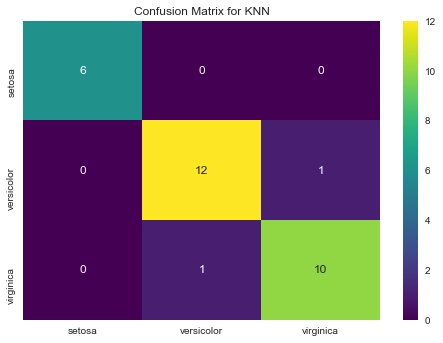

In [13]:
knn= KNN(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("KNN")
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix for KNN")
sns.heatmap(
            data=cm,
            cmap='viridis',
            annot=True,
            xticklabels = ['setosa','versicolor','virginica'],
            yticklabels = ['setosa','versicolor','virginica']
)
plt.savefig(fig_dir+'cm_knn.png')

#### Gaussian Naive Bayes


NB
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.90      0.69      0.78        13
   virginica       0.71      0.91      0.80        11

    accuracy                           0.83        30
   macro avg       0.87      0.87      0.86        30
weighted avg       0.85      0.83      0.83        30



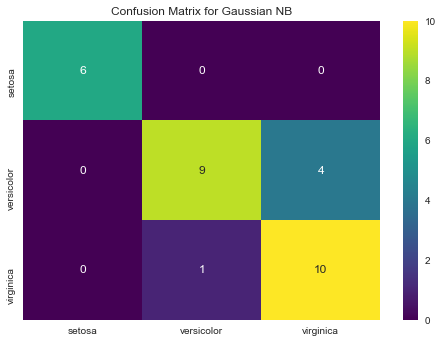

In [14]:
gnb = NB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("\nNB")
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix for Gaussian NB")
sns.heatmap(
            data=cm,
            cmap='viridis',
            annot=True,
            xticklabels = ['setosa','versicolor','virginica'],
            yticklabels = ['setosa','versicolor','virginica']
)
plt.savefig(fig_dir+'cm_gnb.png')

#### Decision Tree


DT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.92      0.85      0.88        13
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30



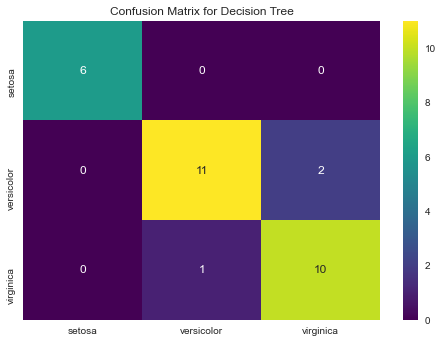

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nDT")
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix for Decision Tree")
sns.heatmap(
            data=cm,
            cmap='viridis',
            annot=True,
            xticklabels = ['setosa','versicolor','virginica'],
            yticklabels = ['setosa','versicolor','virginica']
)
plt.savefig(fig_dir+'cm_dt.png')

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


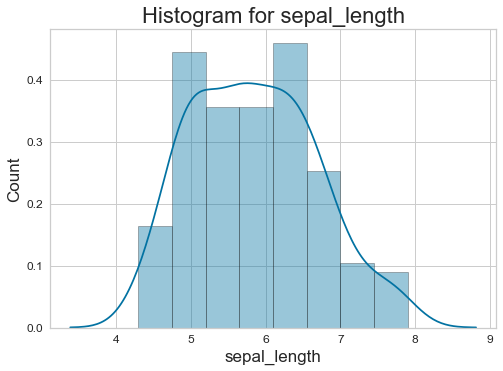

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


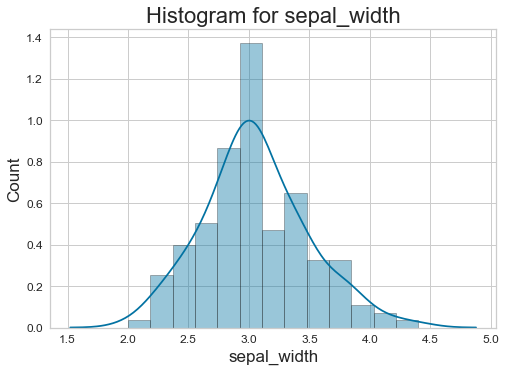

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


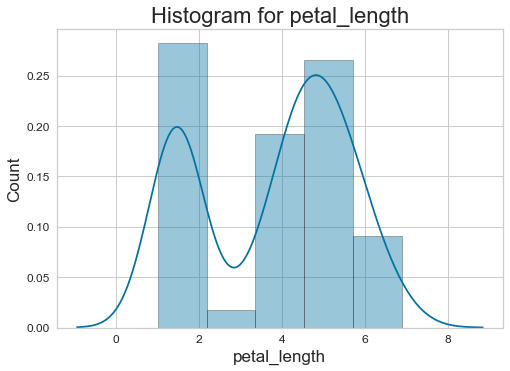

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


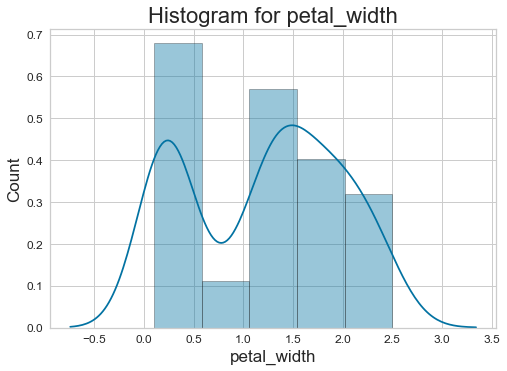

In [16]:

for feature in df.drop('species',axis=1).columns:
    sns.distplot( 
        df[feature],
        hist_kws=dict(edgecolor="k", linewidth=0.75)
    )
    plt.title(f'Histogram for {feature}', fontsize=22)
    plt.xlabel(f'{feature}' , fontsize=17)
    plt.ylabel('Count', fontsize=17)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(fig_dir+f'hist_{feature}.png')
    plt.show() 
    

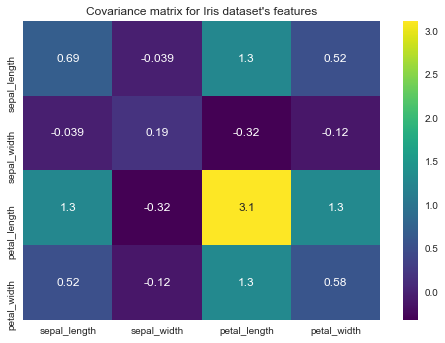

In [17]:
sns.heatmap(
    data = df.cov(),
    annot=True,
    cmap='viridis'
)
plt.title('Covariance matrix for Iris dataset\'s features')
plt.savefig(fig_dir+'cov.png')
plt.show()

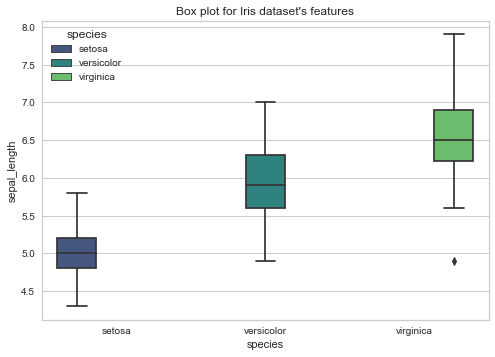

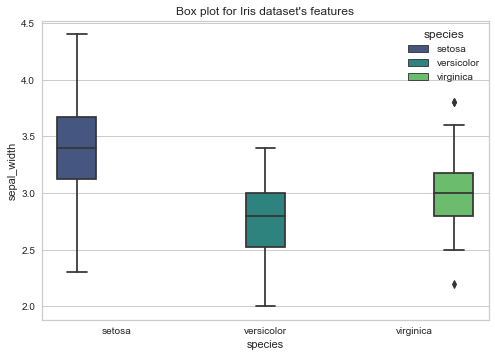

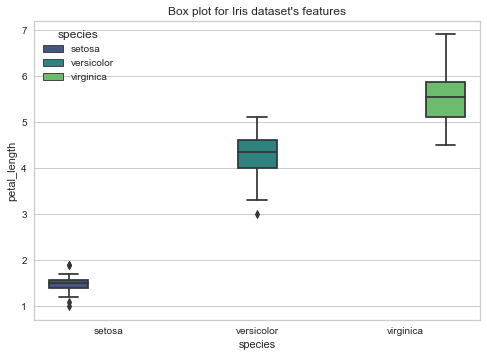

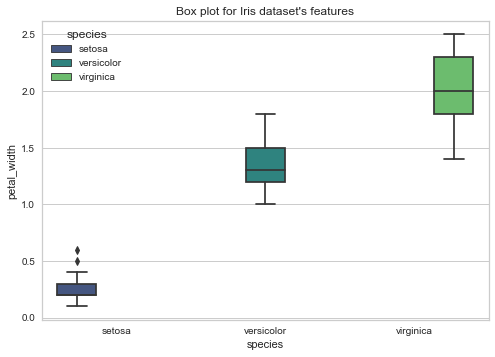

In [18]:
for feat in df.drop('species',axis=1).columns:
    sns.boxplot(
        data=df,
        hue = 'species',
        x = "species",
        y=feat,
        palette='viridis',
    )
    plt.title("Box plot for Iris dataset\'s features")
    plt.savefig(fig_dir+f'bp_feat_{feat}')
    plt.show()